In [1]:
import numpy as np
import pickle
import xarray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import matplotlib.colors as colors
import os
from iwc2tb.GMI.GMI import GMI
import glob
import os
from iwc2tb.GMI.GMI_SatData import GMI_Sat
from iwc2tb.GMI.gmiSatData import gmiSatData
plt.rcParams.update({'font.size': 16})

In [2]:
def read_pickle(file):
    with open(file, "rb") as f:

        iwp_lpa  = pickle.load(f)
        ciwp_lpa = pickle.load(f)
        iwp0     = pickle.load(f)
        ciwp0    = pickle.load(f)

        f.close()
        
        return iwp_lpa, ciwp_lpa, iwp0, ciwp0

In [3]:
file_lpa = "../WorkArea/GMI/gridded_iwp_lpa_jan2017.pickle"
iwp_lpa, ciwp_lpa, iwp0, ciwp0 = read_pickle(file_lpa)

file_lpa_pr1 = "../WorkArea/GMI/gridded_iwp_lpa_pr1_jan2017.pickle"
iwp_lpa_pr1, ciwp_lpa_pr1, iwp0, ciwp0 = read_pickle(file_lpa_pr1)

file_esa = "../WorkArea/GMI/gridded_iwp_lpa_jan2017_v.pickle"
iwp_esa, ciwp_esa, iwp0, ciwp0 = read_pickle(file_esa)

In [4]:
with open("../WorkArea/GMI/gridded_dardar_2009.pickle", "rb") as f:
    iwp_d  = pickle.load(f)
    ciwp_d = pickle.load(f)
    f.close()

In [5]:
with open("../WorkArea/GMI/gridded_spareice.pickle", "rb") as f:
    iwp_s  = pickle.load(f)
    ciwp_s = pickle.load(f)
    f.close()

In [6]:
era_s = "/home/inderpreet/git/Projects/pansat/notebooks/products/ERA5/reanalysis-era5-single-levels-monthly-means/reanalysis-era5-single-levels-monthly-means_202001_total_column_snow_water.nc"

era_i = "/home/inderpreet/git/Projects/pansat/notebooks/products/ERA5/reanalysis-era5-single-levels-monthly-means/reanalysis-era5-single-levels-monthly-means_202001_total_column_cloud_ice_water.nc"

In [7]:
snow = xarray.open_dataset(era_s)
ice = xarray.open_dataset(era_i)

In [8]:
snow

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2020-01-01
Data variables:
    tcsw       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-09-29 19:53:02 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [9]:
sn = snow.tcsw.values
ic = ice.tciw.values
elon = snow.longitude.data
elat = snow.latitude.data

era = sn + ic
era = np.squeeze(era)

In [10]:
elats = np.arange(-90, 90.25, 0.25)
elats.shape

(721,)

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


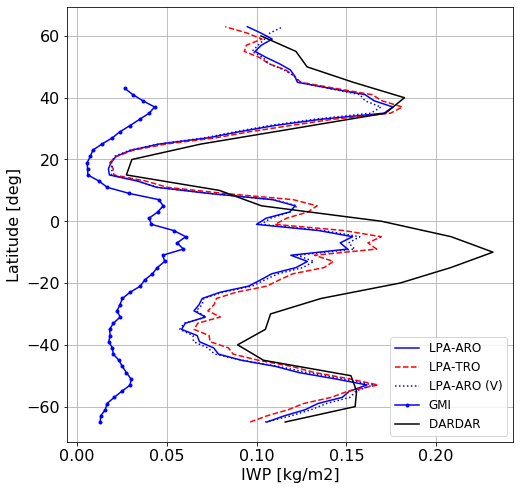

In [11]:
lats = np.arange(-65, 65, 2.0)

lats1 = np.arange(-65, 65, 5.0)

gziwp_s = np.mean(iwp_s/ciwp_s, axis = 1)
gziwp_d = np.mean(iwp_d/ciwp_d, axis = 1)
gziwp_g = np.mean(iwp_lpa/ciwp_lpa, axis = 1)
gziwp_e = np.mean(iwp_esa/ciwp_esa, axis = 1)
gziwp_g1 = np.mean(iwp_lpa_pr1/ciwp_lpa_pr1, axis = 1)
gziwp_g0 = np.mean(iwp0/ciwp0, axis = 1)

#era_mean = np.mean(era, axis = 1)

fig, ax = plt.subplots(1, 1, figsize = [8, 8])


ax.plot(gziwp_g, lats, 'b-', label = "LPA-ARO ")
ax.plot(gziwp_g1, lats, 'r--', label = "LPA-TRO ")
ax.plot(gziwp_e, lats, 'b:', label = "LPA-ARO (V)")
ax.plot(gziwp_g0, lats, 'b.-', label = "GMI")
ax.plot(gziwp_d, lats1, 'k', label = "DARDAR ")
#ax.plot(0.001 * gziwp_s, lats,'k--', label = "SI ", )

#ax.plot(era_mean, elats, "c", label = "ERA")

ax.legend(prop={'size': 12})

ax.set_ylabel("Latitude [deg]")
ax.set_xlabel("IWP [kg/m2]")
ax.grid("on")

fig.savefig("zonal_mean_GMI.pdf", bbox_inches = "tight")

In [12]:
#%% get avg IWP, weighted by cosine of latitude [g/m2]

lats  = np.arange(-65, 65, 2)
cosines = np.cos(np.deg2rad(lats))


print ("SI mean: ", np.sum(gziwp_s * cosines)/np.sum(cosines))
print ("DARDAR mean: ", 1000 * np.sum(gziwp_d * cosines)/np.sum(cosines))
print ("LPA mean ARO: ", 1000 * np.sum(gziwp_g * cosines)/np.sum(cosines)) # g/m2
print ("LPA mean TRO: ", 1000 * np.sum(gziwp_g1 * cosines)/np.sum(cosines)) # g/m2
print ("GPROF mean: ", 1000 * np.sum(gziwp_g0 * cosines)/np.sum(cosines))
print ("ESA mean: ", 1000 * np.sum(gziwp_e * cosines)/np.sum(cosines))

SI mean:  92.74076024463997


ValueError: operands could not be broadcast together with shapes (26,) (65,) 

In [13]:

file = "1B.GPM.GMI.TB2016.20200131-S223646-E000919.033669.V05A" #EXAMPLE1
#file = "1B.GPM.GMI.TB2016.20190615-S144123-E161355.030086.V05A"
#file = "1B.GPM.GMI.TB2016.20200101-S064511-E081744.033192.V05A"
file = "1B.GPM.GMI.TB2016.20170115-S022822-E040055.016374.V05A"#example2

#file = "1B.GPM.GMI.TB2016.20200111-S211936-E225209.033357.V05A"

In [14]:
iwpfile = os.path.expanduser("~/Dendrite/UserAreas/Kaur/IWP/lpa1/" + file + ".nc")
iwpfile_v = os.path.expanduser("~/Dendrite/UserAreas/Kaur/IWP/lpa_pr1/" + file + ".nc")
iwpfile_vh = os.path.expanduser("~/Dendrite/UserAreas/Kaur/IWP/lpa_vh1/" + file + ".nc")
gmifile = os.path.expanduser("~/Dendrite/SatData/GMI/L1B/2017/01/15/" + file + ".HDF5")
#gmifile = os.path.expanduser("~/Dendrite/SatData/GMI/L1B/2017/01/07/" + file + ".HDF5")

In [15]:
dataset = xarray.open_dataset(iwpfile)
dataset_v = xarray.open_dataset(iwpfile_v)
#dataset_vh = xarray.open_dataset(iwpfile_vh)


In [16]:
dataset.lon.data.max()

359.99835

In [17]:
np.sum(dataset_v.stype.data == 3)

1078

In [18]:
gmi = GMI_Sat(gmifile)

batchSize          = 4
inputs             = np.array(["ta", "t2m",  "wvp", "z0", "lat", "stype"])
outputs            = "iwp"

latlims            = [0, 65]
gmival             = gmiSatData(gmi, 
                         inputs, outputs,
                         batch_size = batchSize,
                         latlims = latlims,
                         normalize = None )


glsm = np.argmax(gmival.stype, axis = 2)
wvp = gmival.wvp
t2m = gmival.t2m
glat = gmival.lat
glon = gmival.lon



In [19]:
gmival.lat[mask2]

NameError: name 'mask2' is not defined

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


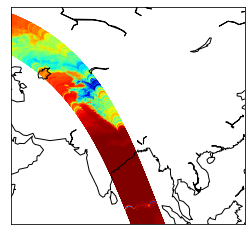

In [20]:
fig, ax = plt.subplots(1, 1)
m = Basemap(projection= "cyl", llcrnrlon = 50,  llcrnrlat = 0,
            urcrnrlon = 120, urcrnrlat = 65, ax = ax)
m.drawcoastlines() 
m.scatter(glon, glat, c = gmival.x[:, :, 0], vmin = 150, vmax = 280, cmap = cm.jet)

In [21]:
glon = glon%360

In [22]:
gtb = gmival.x[:, :, :4]
pd = gtb[:, :, 0] - gtb[:,:, 1] 

In [23]:
gtb[:, :, 0]

array([[261.66385, 262.4006 , 264.07013, ..., 275.0311 , 274.44812,
        273.75845],
       [262.38052, 262.41898, 261.26306, ..., 275.31708, 275.77377,
        275.5395 ],
       [261.67926, 261.34497, 262.36783, ..., 274.69995, 274.3551 ,
        275.4497 ],
       ...,
       [254.3249 , 254.12245, 254.79996, ..., 262.991  , 262.1208 ,
        260.66168],
       [256.41727, 255.55025, 255.91588, ..., 264.07648, 262.76727,
        262.97592],
       [256.63376, 256.9228 , 257.95627, ..., 263.42468, 262.67117,
        264.36792]], dtype=float32)

In [24]:
glon = glon%360


In [25]:
t0 = gmival.t2m
z0 = gmival.z0

In [26]:
lonlims = [25, 55]
latlims = [-54, -48]

lonlims = [185, 195]
latlims = [-3, -1]

lonlims = [275, 285]
latlims = [50, 58]

lonlims = [87, 100]
latlims = [-10, -2]

#example1
#lonlims = [155, 180]
#latlims = [40, 48]

#example2
#lonlims = [89, 99]
#latlims = [-8, -4]


#lonlims = [265, 285]
#latlims = [40, 50]

In [27]:
snow = False; water = False; land = False; seaice = False; All = True; snowland = False

In [28]:
if snow is True:
    mask  = (dataset.stype == 2) & (dataset.lat > latlims[0]) & (dataset.lat < latlims[1]) &  (dataset.lon > lonlims[0]) & (dataset.lon < lonlims[1]) 
    #mask2 = (glsm == 8) | (glsm == 9) & (glsm == 10) 
    mask2 = glsm == 2 
    
if water is True:
    mask  = (dataset.stype == 0) & (dataset.lat > latlims[0]) & (dataset.lat < latlims[1]) &  (dataset.lon > lonlims[0]) & (dataset.lon < lonlims[1]) 
    mask2 = (glsm == 0) 

if land is True:
    mask  = (dataset.stype == 1) & (dataset.lat > latlims[0]) & (dataset.lat < latlims[1]) &  (dataset.lon > lonlims[0]) & (dataset.lon < lonlims[1]) 
    mask2 = (glsm == 1)
   # mask2 = glsm == 1
        
if seaice is True:
    mask  = (dataset.stype == 7) & (dataset.lat > latlims[0]) & (dataset.lat < latlims[1]) &  (dataset.lon > lonlims[0]) & (dataset.lon < lonlims[1]) 
    mask2 = (glsm == 7) 
    #mask2 = (glsm == 3) 
 
if All is True:
    mask  = dataset.stype > -1
    mask2 = glsm > -1 
    #mask2 = (glsm == 3) 

if snowland is True:
    mask  = (dataset.stype == 2) | (dataset.stype == 1) 
    im     = (dataset.lat > latlims[0]) & (dataset.lat < latlims[1]) &  (dataset.lon > lonlims[0]) & (dataset.lon < lonlims[1]) 
    #mask2 = (glsm == 8) | (glsm == 9) & (glsm == 10) 
    mask2 = (glsm == 2) | (glsm == 1)
    mask = mask & im
    
mask3 = (glat > latlims[0]) & (glat < latlims[1]) &  (glon > lonlims[0]) & (glon < lonlims[1]) 
mask2 = np.logical_and(mask2, mask3)




#mask3 = (glsm == 11)  & (np.abs(glat) < 65)

In [29]:
gmival.lst[mask2]

array([datetime.datetime(2017, 1, 15, 9, 36, 27, 942139),
       datetime.datetime(2017, 1, 15, 9, 36, 38, 871704),
       datetime.datetime(2017, 1, 15, 9, 36, 49, 815918), ...,
       datetime.datetime(2017, 1, 15, 10, 16, 50, 694824),
       datetime.datetime(2017, 1, 15, 10, 16, 48, 435303),
       datetime.datetime(2017, 1, 15, 10, 17, 1, 597412)], dtype=object)

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


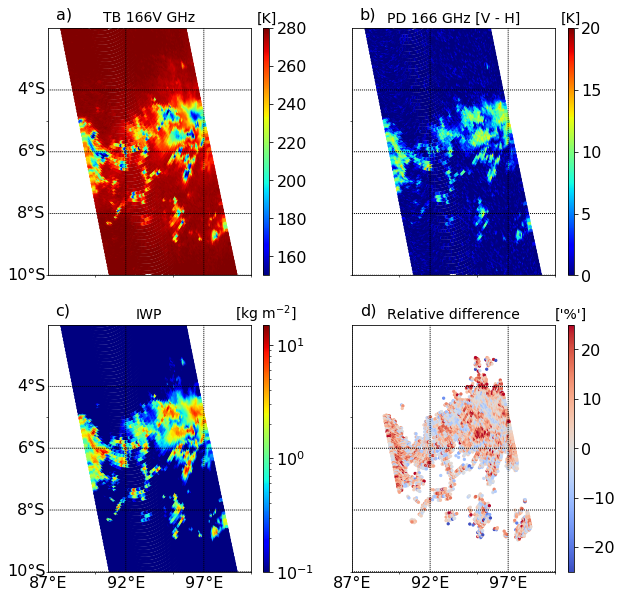

In [37]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(2, 2, figsize = [10, 10])
ax = ax.ravel()


m1 = Basemap(projection= "cyl", llcrnrlon = lonlims[0],  llcrnrlat = latlims[0],
            urcrnrlon = lonlims[1], urcrnrlat = latlims[1], ax = ax[0], fix_aspect = False)
m1.drawcoastlines()  

cs1 = m1.scatter(glon[mask2], glat[mask2],
              c = gtb[:, :, 0][mask2], s = 5, vmin=150, vmax= 280, cmap = cm.jet)


m2 = Basemap(projection= "cyl", llcrnrlon = lonlims[0],  llcrnrlat = latlims[0],
            urcrnrlon = lonlims[1], urcrnrlat = latlims[1], ax = ax[1], fix_aspect = False)
m2.drawcoastlines()  
cs2 = m2.scatter(glon[mask2], glat[mask2],
              c = pd[mask2] , s = 5, vmin=0, vmax=20, cmap = cm.jet)


#m3 = Basemap(projection= "cyl", llcrnrlon = lonlims[0],  llcrnrlat = latlims[0],
#            urcrnrlon = lonlims[1], urcrnrlat = latlims[1], ax = ax[2], fix_aspect = False)
#m3.drawcoastlines()  
#cs3 = m3.scatter(lon1, lat1, 
#              c = rad1, s = 5,
#                    vmin=10, vmax= 70  ,cmap = cm.Greys)

m3 = Basemap(projection= "cyl", llcrnrlon = lonlims[0],  llcrnrlat = latlims[0],
            urcrnrlon = lonlims[1], urcrnrlat = latlims[1], ax = ax[2], fix_aspect = False)
m3.drawcoastlines()  


#cs4 = m4.scatter(dataset.lon.data[mask], dataset.lat.data[mask], 
#              c = dataset.iwp_mean.data[mask] , s = 5,
#                    norm=colors.LogNorm(vmin=1e-2, vmax= 15 ), cmap = cm.jet)

cs3 = m3.scatter(dataset.lon.data[mask], dataset.lat.data[mask], 
              c = dataset.iwp_mean.data[mask], s = 5,
                    norm=colors.LogNorm(vmin=.1, vmax= 15),  cmap = cm.jet)


m4 = Basemap(projection= "cyl", llcrnrlon = lonlims[0],  llcrnrlat = latlims[0],
            urcrnrlon = lonlims[1], urcrnrlat = latlims[1], ax = ax[3], fix_aspect = False)
m4.drawcoastlines()  


#cs4 = m4.scatter(dataset.lon.data[mask], dataset.lat.data[mask], 
#              c = dataset.iwp_mean.data[mask] , s = 5,
#                    norm=colors.LogNorm(vmin=1e-2, vmax= 15 ), cmap = cm.jet)
mask3 = dataset.iwp_mean.data[mask] > 0.1
cs4 = m4.scatter(dataset.lon.data[mask][mask3], dataset.lat.data[mask][mask3], 
              c = 100 *(dataset_v.iwp_mean.data[mask][mask3] - dataset.iwp_mean.data[mask][mask3])/dataset.iwp_mean.data[mask][mask3]
                 , s = 5,
                    vmin=-25, vmax= 25,  cmap = cm.coolwarm)



cbar1 = fig.colorbar(cs1, ax = (ax[0]), aspect=40)
cbar2 = fig.colorbar(cs2, ax = (ax[1]), aspect=40)
cbar3 = fig.colorbar(cs3, ax = (ax[2]), aspect=40)
cbar4 = fig.colorbar(cs4, ax = (ax[3]), aspect=40)

cbar1.ax.set_title("[K]", fontsize = 14)
cbar2.ax.set_title("[K]", fontsize = 14)
cbar3.ax.set_title(r"[kg m$^{-2}$]", fontsize = 14)
cbar4.ax.set_title(["%"], fontsize = 14)

ax[2].set_title("IWP", fontsize = 14)
ax[3].set_title("Relative difference", fontsize = 14)
ax[0].set_title("TB 166V GHz",fontsize = 14)
ax[1].set_title("PD 166 GHz [V - H]", fontsize = 14)

#ax[0].set_ylabel(r"Latitude [$\circ$]")
#ax[2].set_ylabel(r"Latitude [$\circ$]")

#ax[2].set_xlabel(r"Longitude [$\circ$]")
#ax[3].set_xlabel(r"Longitude [$\circ$]")

from matplotlib.ticker import MultipleLocator
mlx = MultipleLocator(5)
mly = MultipleLocator(5)

for i in range(4):
    ax[i].xaxis.set_minor_locator(mlx)
    ax[i].yaxis.set_minor_locator(mly)
    ax[i].set_xlim([lonlims[0], lonlims[1]])
    ax[i].set_ylim([latlims[0], latlims[1]])
    ax[i].grid("True", alpha = 0.3)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[3].set_yticklabels([])

ax[0].text(87.5, -1.7, "a)")
ax[1].text(87.5, -1.7, "b)")
ax[2].text(87.5, -1.7, "c)")
ax[3].text(87.5, -1.7, "d)")
parallels = np.arange(latlims[0],latlims[1], 2.)
meridians = np.arange(lonlims[0], lonlims[1], 5.)
# labels = [left,right,top,bottom]


m1.drawparallels(parallels,labels=[True,False,True,False])
m1.drawmeridians(meridians,labels=[False,False,False,False])
m2.drawparallels(parallels,labels=[False,False,False,False])
m2.drawmeridians(meridians,labels=[False,False,False,False])
m3.drawparallels(parallels,labels=[True,False,True,False])
m3.drawmeridians(meridians,labels=[True,False,False,True])
m4.drawparallels(parallels,labels=[False,False,False,False])
m4.drawmeridians(meridians,labels=[True,False,False,True])


    
fig.savefig("example2_gmi.pdf", bbox_inches = "tight")
fig.savefig("example2_gmi.png", bbox_inches = "tight")

In [ ]:
import pickle

with open("../iwc2tb/GMI/GOES-15jan2020.pickle", "rb") as f:
    rad = pickle.load(f)
    golat = pickle.load(f)
    golon = pickle.load(f)

In [ ]:
rad.shape

In [ ]:
# find collocations
rad1 = np.zeros(glon[mask2].shape)
lat1 = np.zeros(glon[mask2].shape)
lon1 = np.zeros(glon[mask2].shape)

for i in range(0, glon[mask2].shape[0]):
    lo = glon[mask2][i]
    la = glat[mask2][i]
    
    dist = np.sqrt((golon - lo)**2 + (golat - la)**2)
    
    im = np.argmin(dist)
    #print (golat[im], golon[im], la, lo)
    
    rad1[i] = rad[im]
    lat1[i] = golat[im]
    lon1[i] = golon[im]
    
    

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = [6, 6])



m1 = Basemap(projection= "cyl", llcrnrlon = lonlims[0],  llcrnrlat = latlims[0],
            urcrnrlon = lonlims[1], urcrnrlat = latlims[1], ax = ax, fix_aspect = False)
m1.drawcoastlines()  
cs = m1.scatter(lon1, lat1, c = rad1, cmap = cm.Greys, s = 2, vmin = 20, vmax = 70)
plt.colorbar(cs)

In [ ]:
rad1.max()

In [ ]:
glsm[mask2].max()

In [ ]:
plt.scatter(dataset.lon.data[mask], dataset.lat.data[mask])

In [ ]:
np.sum(mask2)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = [18, 6])
ax = ax.ravel()

cs = ax[0].scatter(gtb[:, :, 0][mask2], pd[mask2] ,
                c =  dataset.iwp_mean.data[mask], 
                s = 1, norm=colors.LogNorm(vmin=0.01, vmax= 10), 
                cmap = cm.rainbow)
cs = ax[1].scatter( gtb[:, :, 0][mask2], pd[mask2],
                c =  dataset_v.iwp_mean.data[mask], 
                s = 1, norm=colors.LogNorm(vmin=0.01, vmax= 10), 
                cmap = cm.rainbow)
cs = ax[2].scatter( gtb[:, :, 0][mask2], pd[mask2],
                c =  dataset_v.iwp_mean.data[mask] - dataset.iwp_mean.data[mask], 
                s = 1, vmin=-1, vmax= 1, 
                cmap = cm.coolwarm)

#cs = ax[2].scatter(gmi.tb[:, :, 0][mask3], pd[mask3],
#                c =  glsm[mask3], vmin=1, vmax= 13, 
#                cmap = cm.tab10, s = 1)

fig.colorbar(cs, ax = ax)
ax[0].set_xlabel(r"183$\pm$7 GHz")
ax[0].set_ylabel("PD 166 GHz")
ax[1].set_xlabel(r"183$\pm$7 GHz")
ax[2].set_xlabel(r"183$\pm$7 GHz")

ax[0].grid("on")
ax[1].grid("on")
ax[2].grid("on")
ax[0].set_title("IWP (VH)")
ax[1].set_title("IWP (V)")
ax[2].set_title("IWP (VH/2)")

for i in range(3):
    ax[i].set_xlim([150, 290])
    ax[i].set_ylim([-5, 50])
    ax[i].grid('on')

In [ ]:
im = mask2 & (dataset_v.iwp_mean > 0.1)

In [ ]:
import xarray
import os

#infile = os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jul_2010.nc")
infile = os.path.expanduser("~/Dendrite/Projects/IWP/GMI/training_data/TB_GMI_train_jan_lpa.nc")

In [ ]:
gdataset = xarray.open_dataset(infile)
ttb = gdataset.ta.data
tlsm = gdataset.ta.stype
tiwp = gdataset.ta.iwp

from iwc2tb.common.add_gaussian_noise import add_gaussian_noise
nedt = np.array([0.70, 0.65, 0.47, 0.56 ])
ttb = add_gaussian_noise(ttb, nedt)

im = (tlsm == 2) & (gdataset.ta.lat > 0) & (tiwp > 0.01)
im1 = (tlsm == 1)& (gdataset.ta.lat > 45) & (tiwp > 0.1)

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = [20, 5])
ax = ax.ravel()


ax[0].scatter(t2m[mask2],   pd[mask2],
              c =  dataset.iwp_mean.data[mask],  norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)
#ax[0].set_xscale("log")

ax[1].scatter(t2m[mask2],   pd[mask2],
              c =  dataset_v.iwp_mean.data[mask],  norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)


ax[2].scatter(t2m[mask2],   pd[mask2],
              c =  dataset_vh.iwp_mean.data[mask], norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)


cs = ax[3].scatter(gdataset.ta.t2m[im], (ttb[:, 0] - ttb[:, 1])[im], 
              c = tiwp[im], norm=colors.LogNorm(vmin=0.01, vmax= 10), s = 2, 
                cmap = cm.rainbow)

#for i in range(2):
#    ax[i].set_xlim([220, 280])
#    ax[i].set_ylim([160, 280])
#ax[1].set_xscale("log")
for i in range(4):
    ax[i].set_xlim([240, 300])
    ax[i].set_ylim([-5, 35])
    ax[i].grid()
    
fig.colorbar(cs, ax= ax)    
#ax[1].set_xscale("log")

In [ ]:

fig, ax = plt.subplots(1, 1, figsize = [6, 6])
tbbins = np.arange(200, 300, 1)

ax.hist(gmi.tb[:, :, 0][mask2], tbbins, density = True, histtype = "step", label = "GMI Snow")

ax.hist(tb[:, 0][im], tbbins, density = True, histtype = "step", label = "Database Snow")
ax.hist(tb[:, 0][im1], tbbins, density = True, histtype = "step", label = "Database Land")
ax.legend()

In [ ]:
pd.shape

In [ ]:
plt.scatter(dataset.iwp_mean.data[mask], dataset_v.iwp_mean.data[mask])
x = np.arange(0, 2,1)
plt.plot(x, x)

In [ ]:
latlims = [80, 90]
lonlims = [35, 45]

gmimask = (gmi.lat > latlims[0]) & (gmi.lat < latlims[1]) & (gmi.lon > lonlims[0]) & (gmi.lon < lonlims[1])

imask  = (dataset.lat > latlims[0]) & (dataset.lat < latlims[1]) & (dataset.lon > lonlims[0]) & (dataset.lon < lonlims[1]) 


In [ ]:

#inpath    =  os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65/')  
inpath1   =  os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65_v1.1/lpa_pr_1') 
matfiles1 = glob.glob(os.path.join(inpath1, "2009_*.mat"))

#matfiles += matfiles1

lpa_pr1       = GMI(matfiles1[:])
arofiles = []
basenames = []
aropath = os.path.expanduser('~/Dendrite/Projects/IWP/GMI/GMI_m65_p65_v1.1/') 
for file in matfiles1:
        
    basename = os.path.basename(file)
    file = os.path.join(aropath, basename)

    arofiles.append(file)
    basenames.append(basename)
    
lpa = GMI(arofiles[:])  

In [ ]:
ta = lpa.ta_noise
stype = lpa.stype


In [ ]:
lpamask = stype == 1

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = [6, 6])
ax.scatter(ta[:, 0][lpamask], ta[:, 1][lpamask])
ax.scatter(gmi.tb[:, :, 0][mask2],gmi.tb[:, :, 1][mask2] ,
               s = 3,)
cs = ax.scatter(gmi.tb[:, :, 0][gmimask],gmi.tb[:, :, 1][gmimask] , c = dataset_v.iwp_mean.data[imask],
                s = 3,  norm=colors.LogNorm(vmin=0.01, vmax= 5),  cmap = cm.rainbow)

fig.colorbar(cs, ax = ax)
ax.set_xlabel("166 V")
ax.set_ylabel("166 H")
ax.grid("on")
x = np.arange(150, 280)
ax.plot(x, x, 'k')
#plt.scatter(gmi.tb[:, :, 0][mask3],gmi.tb[:, :, 1][mask3] )


In [ ]:
dataset.iwp_mean.data

In [ ]:
plt.scatter(gmi.lon[gmimask], gmi.lat[gmimask], c = gmi.tb[:, :, 0][gmimask], s = 3, vmin=210, vmax= 260, cmap = cm.tab20c)

In [ ]:
fp = gmi.get_gprofdata("frozenPrecipitation")
sp = gmi.get_gprofdata("surfacePrecipitation")

In [ ]:
gmi.get_gprofdata("x")

In [ ]:
mask2 = dataset.stype.data == 0
fig, ax = plt.subplots(1, 1, figsize =[6, 6])
ax.scatter(dataset_v.iwp_mean.data[mask2], dataset.iwp_mean.data[mask2])
x = np.arange(0, 5,1)
ax.plot(x, x, 'k')
ax.set_xlabel("ARO V")
ax.set_ylabel("ARO VH")

In [ ]:
t